# Day 01 - Creating an Environment URDF

In this hands-on tutorial, you'll learn how to create a simulation environment in URDF (Unified Robot Description Format).

This tutorial is also intended to familiarize you with the JupyterLab interface, which will be used in subsequent hands-on tutorials at Fallschool.

<!-- > Note: This tutorial assumes you know how to write well-formatted XML code -->

## 0. Open an empty URDF: 👉 [empty.urdf](../empty.jupyterlab-workspace)

You will see a `URDF` file and a 3D scene on the right. 

### What is URDF?

URDF is an XML file format for specifying the geometry and organization of 3D robots. The three primary elements in a URDF file are `<robot>`, `<link>`, and `<joint>`.

It was originally designed to describe robots, so the root element is called `<robot>`. However, here, we use it to describe the environments in which the robot interacts.

## 1.What is `<link>`?

A `<link>` element represents a physical part of the environment, which could be as simple as a box or as complex as a piece of furniture.

### Three basic shapes

First, let's take a look at three basic geometry shapes: box, cylinder, and sphere. Each shape is defined as a `<link>` element in URDF. Different shapes use different properties to define their size.

The `<origin>` element defines the orientation and position of the shape in the 3D environment. The `rpy` specifies the orientation in terms of roll, pitch, and yaw angles, defining the rotation around the x, y, and z axis respectively. The `xyz` specifies the positions.

```xml
<origin rpy="r p y" xyz="x y z"/>
```

**Copy the following XML code to the URDF file.**  Change their properties to see what will happen!



**Box**
```xml
<link name="box_1">
    <visual>
        <geometry>
            <box size="0.5 0.5 0.5"/>
        </geometry>
        <origin rpy="0 0 0" xyz="0 0 0"/>
    </visual>
</link>
```

**Cylinder**
```xml
<link name="cylinder_1">
    <visual>
        <geometry>
            <cylinder length="1.5" radius="0.1"/>
        </geometry>
        <origin rpy="0 0 0" xyz="0 0 0"/>
    </visual>
</link>
```

**Sphere**
```xml
<link name="sphere_1">
    <visual>
        <geometry>
            <sphere radius="0.3"/>
        </geometry>
        <origin rpy="0 0 0" xyz="0 0 0"/>
    </visual>
</link>
```

## 2. What is `<joint>`?

In the previous step, we created some components in the scene, but they are not connected to each other. To enable movement and define the relationship between components (`links`), we need to define `joints`. Here, we introduce two types of joints: `revolute` (rotational) joint and `prismatic` (linear sliding) joint.


### A revolute joint allows rotational movement around a specified axis.

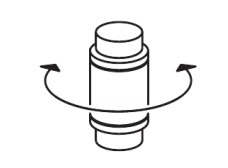

* Parent link: The stationary or base link.
* Child link: The link that moves relative to the parent.
* Limit: Specifies the minimum and maximum rotation angles in radians.
* Axis: Specifies the axis of rotation.

**Rotational joint**
```xml
<joint name="joint_rev" type="revolute">
    <parent link="cylinder_1"/>
    <child link="box_1"/>
    <limit lower="0" upper="1.57"/>
    <axis xyz="0 0 1" /> 
    <origin rpy="0 0 0" xyz="0 0 0"/>
</joint>
```

The `limit` requires angles in radians, so we need to convert degrees to radians using the following Python function. Once we have defined the joint, we can test the movement in the right panel of the 3D scene.

In [7]:
import math
math.radians(90)

1.5707963267948966

### A prismatic joint allows linear movement along a specified axis.

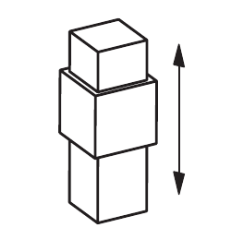

* Limit: Sets the range of movement along the axis.
* Axis: Defines the direction of sliding.


**Linear sliding**
```xml
<joint name="joint_pri" type="prismatic">
    <parent link="cylinder_1"/>
    <child link="sphere_1"/>
    <limit lower="-0.5" upper="0.5"/>
    <axis xyz="0 0 1" /> 
    <origin rpy="0 0 0" xyz="0 0 0"/>
</joint>
```

## 3. Add Visual Material

We can colors to a links using the `<material>` elements.


```xml
<material name="yellow">
    <color rgba="0.6 0.396 0.082 1"/>
</material>
```

```xml
<link name="sphere_1">
    <visual>
        <geometry>
            <sphere radius="0.3"/>
        </geometry>
        <origin rpy="0 0 0" xyz="0 0 0"/>
        <material name="yellow"/>
    </visual>
</link>
```

## 4. Collision and Physics

Up to this point, we have only defined the visual properties of the components. In URDF, physics properties provide essential details to accurately simulate how links and joints behave under physical forces.

Below is a simple example, compared to the previous examples, it also defines a collision shape and inertial properties of the component. Since we are not using any physics engine in this tutorial, these properties will not take effect in the visualizaion. This part will be covered in more detail later in the hands-on tutorial.

```xml
<link name="box_2">
    <visual>
        <geometry>
            <box size="0.5 0.5 0.5"/>
        </geometry>
        <origin rpy="0 0 0" xyz="0 0 0"/>
        <material name="yellow"/>
    </visual>
    <collision>
        <geometry>
            <box size="0.5 0.5 0.5"/>
        </geometry>
    </collision>
    <inertial>
        <mass value="10"/>
        <inertia ixx="1e-3" ixy="0.0" ixz="0.0" iyy="1e-3" iyz="0.0" izz="1e-3"/>
    </inertial>
</link>
```

## 5. Import complex 3d objects

It is difficult to describe realistic objects using only basic geometric shapes. Therefore URDF supports the import of complex 3D shapes from external files. These 3D models are usually created using modeling tools such as blender.

```xml
<link name="spoon">
    <visual>
        <origin xyz="1 1 0" rpy="0 0 0"/>
        <geometry>
            <mesh filename="package://iai_kitchen/meshes/racks/BoxyToolholder/Holder_Spoon.stl" scale="5 5 5"/>
        </geometry>
    </visual>
</link>

<link name="milk_box">
    <visual>
        <origin xyz="0 1 0" rpy="0 0 0"/>
        <geometry>
            <mesh filename="/milk_box/milk_box.dae" scale="5 5 5"/>
        </geometry>
    </visual>
</link>

```

## 6. Let's build a kitchen

Xacro is a macro language for XML. With it, we can define URDF fragments in different files so that we can reuse designed components.

Next, we will quickly build a kitchen scene with some predefined kitchen furniture URDF.

### Open the kitchen scene: [kitchen.urdf.xarco](../kitchen.jupyterlab-workspace)

You will see some kitchen furniture. Try to arrange them in a way that makes sense. If you duplicate some components, remember to change the name of each component; each component needs to have a unique name.

### Kitchen Furniture List

If you want to checkout the details of these components, You can find the source URDF files in the file browser on the left panel.

**Table**

Source File: `iai_kitchen/urdf_obj/IAI_tables.urdf.xacro`
```xml
<xacro:iai_table_1 name="table_1" parent="room_link">
    <origin xyz="1.5 0.75 0" rpy="0 0 ${pi/2}" />
</xacro:iai_table_1>
```

**Chair**

Source File: `iai_kitchen/urdf_obj/IAI_tables.urdf.xacro`
```xml
<xacro:jokkmokk_chair name="chair_1" parent="room_link">
    <origin xyz="1.5 -0.75 0.5535" rpy="0 0 0" />
</xacro:jokkmokk_chair>
```

**Fridge**

Source File: `iai_kitchen/urdf_obj/IAI_tables.urdf.xacro`
```xml
<xacro:iai_fridge_area name="fridge_1" parent="room_link">
    <origin xyz="-1 0 0" rpy="0 0 0" />
</xacro:iai_fridge_area>
```

**Oven**

Source File: `iai_kitchen/urdf_obj/IAI_oven_area.urdf.xacro`
```xml
<xacro:iai_oven_area name="oven_1" parent="room_link">
    <origin xyz="-1 -1.6 0" rpy="0 0 0" />
</xacro:iai_oven_area>
```

**Stove**

Source File: `iai_kitchen/urdf_obj/IAI_kitchen_island.urdf.xacro`
```xml
<xacro:iai_kitchen_island name="stoves_1" parent="room_link">
    <origin xyz="0 0 0" rpy="0 0 0" />
</xacro:iai_kitchen_island>
```

**Sink**

Source File: `iai_kitchen/urdf_obj/sink_area.urdf.xacro`
```xml
<xacro:iai_sink_area name="sink_area" parent="room_link">
    <origin xyz="0 -2.5 0" rpy="0 0 0" />
</xacro:iai_sink_area>
```

### Finally, checkout our IAI kitchen lab Digital Twin: [iai_kitchen.urdf.xacro](./iai_kitchen.urdf.xacro)

## Further Exercies

### ROS2 URDF Tutorial
Fetch the tutorial materials

In [ ]:
!git clone https://github.com/ros/urdf_tutorial.git -b ros2
!cp urdf_tutorial/urdf/* $PWD

|  Tutorials |  Name | URDF File (click to open file)  |
|---|---|---|
| [Building a visual robot model from scratch](https://docs.ros.org/en/humble/Tutorials/Intermediate/URDF/Building-a-Visual-Robot-Model-with-URDF-from-Scratch.html) | One Shape | [01-myfirst.urdf](./01-myfirst.urdf) |
|  |  Multiple Shapes  | [02-multipleshapes.urdf](./02-multipleshapes.urdf)  |
|   |  Origins |  [03-origins.urdf.urdf](./03-origins.urdf.urdf) |
|   |  Material |  [04-materials.urdf](./04-materials.urdf)|
|   |  Completed Visual Model |  [05-visual.urdf](./05-visual.urdf) |
|  [Building a movable robot model](https://docs.ros.org/en/humble/Tutorials/Intermediate/URDF/Building-a-Movable-Robot-Model-with-URDF.html) | Movable Robot Model |  [06-flexible.urdf](./06-flexible.urdf) |
| [Adding physical and collision properties](https://docs.ros.org/en/humble/Tutorials/Intermediate/URDF/Adding-Physical-and-Collision-Properties-to-a-URDF-Model.html) |  Physical and Collision | [07-physics.urdf](./07-physics.urdf) |
| [Using Xacro to clean up your code](https://docs.ros.org/en/humble/Tutorials/Intermediate/URDF/Using-Xacro-to-Clean-Up-a-URDF-File.html) |  Using Xacro |   [08-macroed.urdf.xacro](./08-macroed.urdf.xacro) |